## An Exploration of UN data
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

In [2]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Guided Practice:
1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:
    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top of your notebook

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

In [3]:
un = pd.read_csv('../data/gdp_per_capita.csv')
un.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,NaN
7,Afghanistan,2013,2116.465258,NaN
8,Afghanistan,2012,2075.491614,NaN
9,Afghanistan,2011,1904.559926,NaN


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
un.drop(columns=['Value Footnotes'], axis = 1, inplace=True)

In [5]:
un.head()

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [6]:
un.shape[0]

7176

In [7]:
#len(un.index)
un.index

RangeIndex(start=0, stop=7176, step=1)

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [8]:
un['Year'].value_counts()

2017    242
2016    242
2018    242
2014    242
2013    242
2015    242
2019    241
2011    240
2012    240
2020    240
2010    239
2009    239
2008    238
2007    237
2006    237
2005    236
2004    236
2002    235
2003    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

8. How many countries are represented in this dataset?  

In [13]:
un['Country or Area'].nunique()

242

Which countries are least represented in the dataset?

In [12]:
country_valuecounts = un['Country or Area'].value_counts()
country_valuecounts.tail()

Kosovo                       13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands     10
Djibouti                      8
Somalia                       8
Name: Country or Area, dtype: int64

Why do you think these countries have so few observations?

9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [20]:
gdp_2014 = un[un['Year'] == 2014]
gdp_2014.head()

,Country or Area,Year,Value
6,Afghanistan,2014,2102.384604
25,Africa Eastern and Southern,2014,3677.319414
56,Africa Western and Central,2014,4215.646000
87,Albania,2014,11586.833878
118,Algeria,2014,11512.690472


10. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [21]:
gdp_2014.describe()

,Year,Value
count,242.0,242.000000
mean,2014.0,19612.875611
std,0.0,20961.714572
min,2014.0,822.611195
25%,2014.0,4702.212961
50%,2014.0,12178.874687
75%,2014.0,26461.384188
max,2014.0,155201.740571


Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

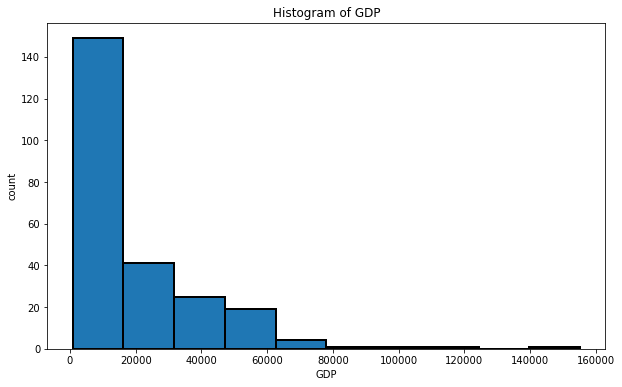

In [22]:
fig,ax = plt.subplots(figsize = (10,6))               

plt.hist(
    data = gdp_2014,
    x = 'Value',
    edgecolor = 'black',
    linewidth = 2
);                              
plt.xlabel('GDP')                            
plt.ylabel('count')
plt.title('Histogram of GDP');

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2018.

In [30]:
gdp_2018 = un[un['Year'] == 2018]
gdp_2018.nlargest(5, 'Value')

,Country or Area,Year,Value
3915,"Macao SAR, China",2018,132373.544079
3884,Luxembourg,2018,115049.926079
5722,Singapore,2018,98336.956494
5383,Qatar,2018,90970.060902
3073,Ireland,2018,83726.362961


In [31]:
gdp_2018.nsmallest(5, 'Value')

,Country or Area,Year,Value
916,Burundi,2018,761.524143
1138,Central African Republic,2018,933.109951
1526,Dem. Rep. Congo,2018,1085.893688
5873,Somalia,2018,1129.531464
4752,Niger,2018,1200.402348


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2018 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2018. Save the result to a dataframe named `gdp_pivoted`.

In [33]:
#gdp_pivoted = un.pivot_table()